In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats, special

# Parameter estimation using $\chi^2$

For multi-parameter models, using the multivariate normal to characterize probabilities for the joint probability distribution becomes a bit cumbersome.  Here, we will introduce an alternative way to derive uncertainties using $\chi^2$.

First, some preliminaries.

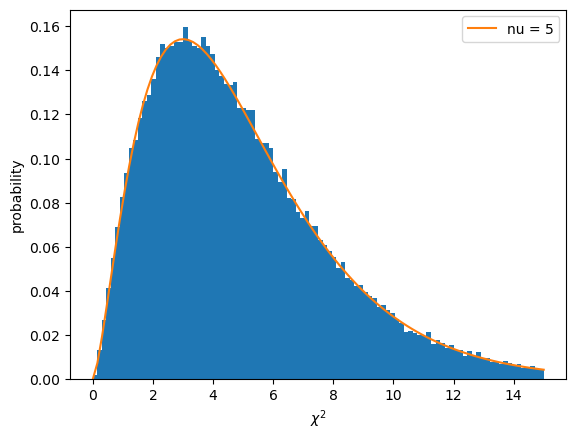

In [2]:
# This is a cell from an earlier notebook (ChiSquared2) with some
# small changes.
mu  = 5.0   # parent population mean
sig = 2.0   # parent population standard deviation

# Let's draw this many random numbers each simulation.
n   = 5    # degrees of freedom

# and many simulations so we can plot the distribution.
nsims = 100000

chi2vals = np.zeros(nsims)
for i in range(nsims):
    x = np.random.normal(loc=mu, scale=sig, size=n)
    chi2vals[i] = np.sum(((x-mu)/sig)**2)

# plot the histogram of the nsims realizations
xmax = n*3  # x axis to 3 times the mean (=n)
a,b,c = plt.hist(chi2vals, range=[0, xmax], bins=100, density=True)

# and overplot the theoretical chi-squared distribution with
# the same nu degrees of freedom
xgrid = np.linspace(0, xmax, 100)
chi2pdf = stats.chi2.pdf(xgrid, n)
plt.plot(xgrid, chi2pdf, label='nu = %d' %n)
plt.xlabel('$\chi^2$')
plt.ylabel('probability')
plt.legend()

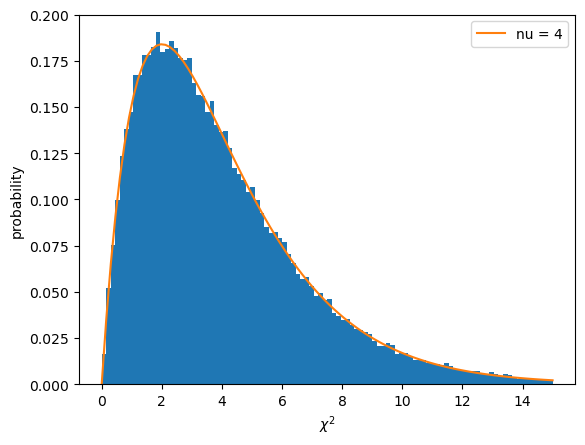

In [3]:
# We are repeating the above cell, but this time using the sample mean
# rather than the true mean to calculate the chi^2 to show that the
# chi^2 distribution this time is one degree of freedom lower than
# before (because we used one degree of freedom to compute the sample
# mean).
mu  = 5.0   # parent population mean
sig = 2.0   # parent population standard deviation

# Let's draw this many random numbers each simulation.
n  = 5    # degrees of freedom

# and many simulations so we can plot the distribution.
nsims = 100000

chi2vals = np.zeros(nsims)
for i in range(nsims):
    x = np.random.normal(loc=mu, scale=sig, size=n)
    smu = np.mean(x)
    chi2vals[i] = np.sum(((x-smu)/sig)**2)

# plot the histogram of the nsims realizations
xmax = n*3  # x axis to 3 times the mean (=nu)
a,b,c = plt.hist(chi2vals, range=[0, xmax], bins=100, density=True)

# and overplot the theoretical chi-squared distribution with
# nu-1 degrees of freedom
xgrid = np.linspace(0, xmax, 100)
chi2pdf = stats.chi2.pdf(xgrid, n-1)
plt.plot(xgrid, chi2pdf, label='nu = %d' %(n-1))
plt.xlabel('$\chi^2$')
plt.ylabel('probability')
plt.legend()

Now let's just focus on a single simulation (realization).

In [4]:
# set a seed so we always get same results
np.random.seed(12345)

mu  = 5.0   # parent population mean
sig = 2.0   # parent population standard deviation

n   = 5    # degrees of freedom

x = np.random.normal(loc=mu, scale=sig, size=n)
smu   = np.mean(x)
sigmu = sig/np.sqrt(n)
chi2min = np.sum(((x-smu)/sig)**2)

# print summary
np.set_printoptions(formatter={'float': '{: 0.4f}'.format})
print("                Data  = ", x)
print("            MLE mean  = %8.4f" % smu)
print("   MLE error on mean  = %8.4f" % sigmu)
print(" minimum chi^2 value  = %8.4f" % chi2min)

                Data  =  [ 4.5906  5.9579  3.9611  3.8885  8.9316]
            MLE mean  =   5.4659
   MLE error on mean  =   0.8944
 minimum chi^2 value  =   4.4429


Therefore, you can interpret the MLE mean to have a gaussian probability distribution function with a mean of 5.4659 and a standard deviation of 0.8944.

Now, although we obtained the MLE error on the mean through the error propagation formula, there is another way to get the same result by computing the $\chi^2$ value as a function of the mean.

In [5]:
muvals   = np.linspace(2, 9, 1000)
chi2vals = np.zeros(len(muvals))
for i in range(len(muvals)):
    chi2vals[i] = np.sum(((x-muvals[i])/sig)**2)

Text(0, 0.5, '$\\chi^2$')

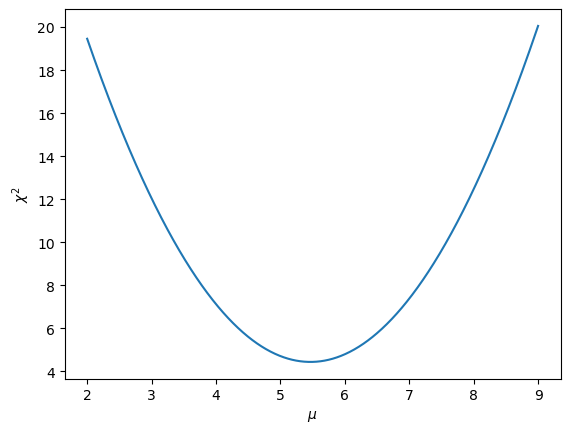

In [6]:
plt.plot(muvals, chi2vals)
plt.xlabel('$\mu$')
plt.ylabel('$\chi^2$')

We can indeed see that $\chi^2$ is minimzed at $\mu^\prime = 5.466$ (at the MLE value) and $\chi^2_{\mathrm{min}} = 4.443$.

Text(0, 0.5, '$\\chi^2$')

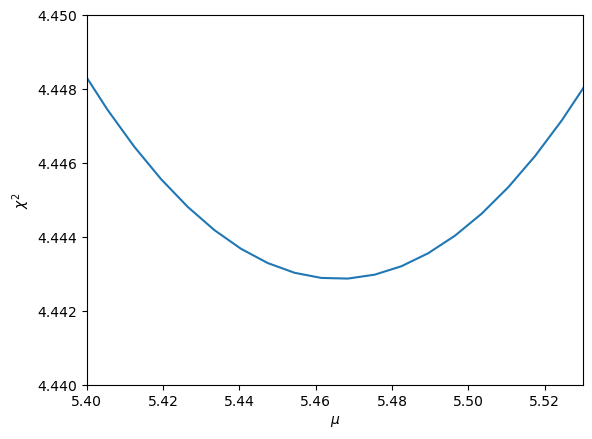

In [7]:
# Zoom in
plt.plot(muvals, chi2vals)
plt.xlim([5.40, 5.53])
plt.ylim([4.44, 4.45])
plt.xlabel('$\mu$')
plt.ylabel('$\chi^2$')

The value of $\mu$ that is 1 standard deviation away from the "best-fit" corresponds to where the $\chi^2$ value is 1.00 greater than the minimum.

The value of $\mu$ that is 2 standard deviation away from the "best-fit" corresponds to where the $\chi^2$ value is 4.00 greater than the minimum.

Text(0, 0.5, '$\\chi^2$')

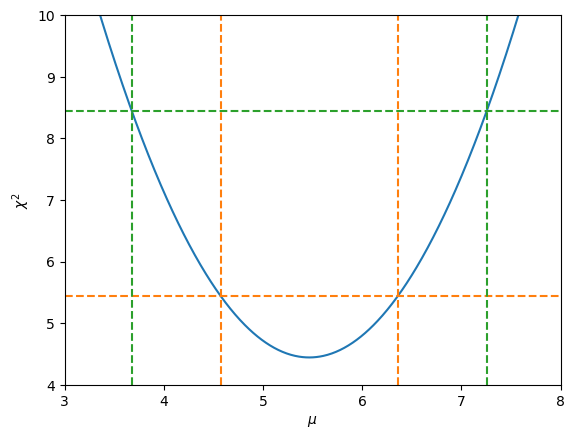

In [8]:
plt.plot(muvals, chi2vals)
plt.axhline(y=chi2min+1.00, ls='--', c='#ff7f0e')
plt.axhline(y=chi2min+4.00, ls='--', c='#2ca02c')
plt.axvline(x=smu-sigmu, ls='--', c='#ff7f0e')
plt.axvline(x=smu+sigmu, ls='--', c='#ff7f0e')
plt.axvline(x=smu-2*sigmu, ls='--', c='#2ca02c')
plt.axvline(x=smu+2*sigmu, ls='--', c='#2ca02c')
plt.xlim([3, 8])
plt.ylim([4, 10])
plt.xlabel('$\mu$')
plt.ylabel('$\chi^2$')

So you can calculate the uncertainties of the parameter from $\Delta \chi^2$ where $\chi^2 = \chi^2_{\mathrm{min}}+\Delta \chi^2$.  For a 1-parameter model ($m=1$) the $\Delta \chi^2$ values that corresponds to $\pm 1, 2, 3 \sigma$ from the mean are $1.00, 4.00$, and $9.00$, respectively.

COMPLETE DIGRESSION -- By the way, the color I used above is specified in "hex", which starts with a `#` followed by 6 digits and characters.  The 6 digits are actually three 2-digit codes that represent red, green, and blue (RGB).  The 2-digit codes range from 00 to ff that represent the strength of each color, and there are 16x16=256 combinations.  e.g., `#000000` is black, `#ffffff` is white, `#ff0000` is red, `#0000ff` is bright blue, and so on.  This is how you can make up 256^3=16.77 million colors on a computer.

The default color scheme in matplotlib cycles through these 10 colors `['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']`.

Continuing on with our discussion.  How do I generalize the $\Delta \chi^2$ method to multiple parameters?

For $m=2$, the $\Delta \chi^2$ contours that encompass $68.27\%$, $95.45\%$, and $99.73\%$ ($\pm 1, 2, 3\sigma$) of the probabilities are $\Delta \chi^2 = 2.30, 6.18, 11.8$.

In [9]:
# For m = 1
print(stats.chi2.cdf(1, df=1))
print(stats.chi2.cdf(4, df=1))
print(stats.chi2.cdf(9, df=1))

print(stats.chi2.ppf(0.6826894921370859, df=1))
print(stats.chi2.ppf(0.9544997361036415, df=1))
print(stats.chi2.ppf(0.9973002039367398, df=1))

0.6826894921370859
0.9544997361036415
0.9973002039367398
0.9999999999999993
3.9999999999999973
8.999999999999986


In [10]:
# For m = 2
print(stats.chi2.ppf(0.6826894921370859, df=2))
print(stats.chi2.ppf(0.9544997361036415, df=2))
print(stats.chi2.ppf(0.9973002039367398, df=2))

print(stats.chi2.cdf(2.30, df=2))
print(stats.chi2.cdf(6.18, df=2))
print(stats.chi2.cdf(11.8, df=2))

2.295748928898636
6.180074306244168
11.829158081900795
0.6833632306209467
0.9544980455953784
0.9972605551812316


The following cell shows why $\Delta \chi^2$ for a 1-parameter model is distributed according to $\chi^2_1$ with one degree of freedom.

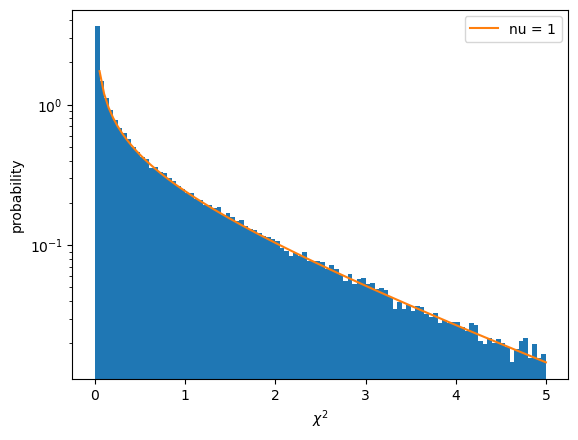

In [11]:
mu  = 5.0   # parent population mean
sig = 2.0   # parent population standard deviation

# Let's draw this many random numbers each simulation.
n  = 5    # degrees of freedom

# and many simulations so we can plot the distribution.
nsims = 100000

chi2vals_mu  = np.zeros(nsims)
chi2vals_smu = np.zeros(nsims)
deltachi2    = np.zeros(nsims)
for i in range(nsims):
    x = np.random.normal(loc=mu, scale=sig, size=n)
    smu = np.mean(x)
    chi2vals_mu[i]  = np.sum(((x-mu)/sig)**2)
    chi2vals_smu[i] = np.sum(((x-smu)/sig)**2)
    deltachi2[i] = chi2vals_mu[i] - chi2vals_smu[i]

# plot the histogram of the nsims realizations
xmax = n  # x axis to 3 times the mean (=nu)
a,b,c = plt.hist(deltachi2, range=[0, xmax], bins=100, density=True)

# and overplot the theoretical chi-squared distribution with
# nu-1 degrees of freedom
xgrid = np.linspace(0, xmax, 100)
chi2pdf = stats.chi2.pdf(xgrid, 1)
plt.plot(xgrid, chi2pdf, label='nu = 1')
plt.yscale('log')
plt.xlabel('$\chi^2$')
plt.ylabel('probability')
plt.legend()